# 基于Riskfolio库的组合投资优化及其应用

Riskfolio-Lib 是一个用于投资组合优化和定量策略资产配置的 Python 库。它的目标是帮助学生、学者和从业人员，轻松建立复杂数学模型的投资组合。它基于 CVXPY ，也大量使用了 pandas 的数据结构。

Riskfolio库 中文文档

https://www.wuzao.com/document/riskfolio-lib/index.html

https://www.yuque.com/wangpeng-lucdx/kb/cyhwomkob37f75q2?singleDoc# 《riskfolio-lib库 中文文档》

A股股票id

https://www.yuque.com/wangpeng-lucdx/kb/kff5ugrp8dise9sm?singleDoc#9b55 《沪深股票代码大全》

### 安装

pip install riskfolio-lib -i https://mirrors.aliyun.com/pypi/simple


In [2]:
import pybroker
from pybroker.ext.data import AKShare
from pybroker import ExecContext, StrategyConfig, Strategy
from pybroker.ext.data import AKShare
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
import riskfolio as rp

#正常显示画图时出现的中文和负号
from pylab import mpl

mpl.rcParams['font.sans-serif']=['SimHei']
mpl.rcParams['axes.unicode_minus']=False

akshare = AKShare()

pybroker.enable_data_source_cache('akshare')

## 通过akshare获取行业股票数据并转换为Riskfolio要求的格式

In [3]:
import akshare as ak

# 获取A股行业板块名称数据
stock_board_industry_name_em_df = ak.stock_board_industry_name_em()
# 打印获取到的数据
print(stock_board_industry_name_em_df)

0it [00:00, ?it/s]

    排名   板块名称    板块代码       最新价      涨跌额    涨跌幅             总市值   换手率  上涨家数  \
0    1   农牧饲渔  BK0433  13624.90   238.67   1.78    989601808000  5.00    49   
1    2     银行  BK0475   3670.21  -180.76  -4.69  13256008960000  0.35     0   
2    3   酿酒行业  BK0477  47796.31 -2407.47  -4.80   3613521936000  1.20     2   
3    4   食品饮料  BK0438  25050.66 -1274.63  -4.84   1543948816000  2.39    15   
4    5   旅游酒店  BK0485  14574.47  -792.20  -5.16    330456016000  3.76     3   
..  ..    ...     ...       ...      ...    ...             ...   ...   ...   
81  82     电机  BK1030   1893.02  -252.33 -11.76    211183710000  2.52     0   
82  83  光学光电子  BK1038   1293.31  -174.12 -11.87    952859856000  1.66     0   
83  84  互联网服务  BK0447  22921.36 -3102.98 -11.92   1601303520000  3.02     0   
84  85     电池  BK1033    831.91  -119.71 -12.58   1725920224000  1.78     0   
85  86   消费电子  BK1037   1269.90  -192.75 -13.18   1651359488000  1.30     0   

    下跌家数  领涨股票  领涨股票-涨跌幅  
0     43  美农生物     20.01

In [4]:
stock_board_industry_name_em_df["板块名称"].values

array(['农牧饲渔', '银行', '酿酒行业', '食品饮料', '旅游酒店', '电力行业', '农药兽药', '铁路公路',
       '航空机场', '贵金属', '小金属', '商业百货', '物流行业', '煤炭行业', '中药', '航运港口', '公用事业',
       '燃气', '水泥建材', '珠宝首饰', '保险', '化肥行业', '电子化学品', '航天航空', '化纤行业',
       '钢铁行业', '美容护理', '石油行业', '装修建材', '工程建设', '生物制品', '房地产开发', '医药商业',
       '证券', '造纸印刷', '综合行业', '汽车整车', '化学制品', '玻璃玻纤', '化学原料', '非金属材料',
       '装修装饰', '多元金融', '专业服务', '化学制药', '有色金属', '医疗器械', '纺织服装', '工程机械',
       '房地产服务', '贸易行业', '包装材料', '文化传媒', '半导体', '汽车服务', '能源金属', '教育',
       '家电行业', '环保行业', '采掘行业', '橡胶制品', '交运设备', '电源设备', '电网设备', '通信服务',
       '船舶制造', '风电设备', '家用轻工', '计算机设备', '工程咨询服务', '游戏', '医疗服务', '塑料制品',
       '仪器仪表', '通信设备', '专用设备', '软件开发', '通用设备', '汽车零部件', '光伏设备', '电子元件',
       '电机', '光学光电子', '互联网服务', '电池', '消费电子'], dtype=object)

In [6]:
stock_board_industry_cons_em_df = ak.stock_board_industry_cons_em(symbol="汽车整车")
print(stock_board_industry_cons_em_df)

0it [00:00, ?it/s]

    序号      代码     名称     最新价    涨跌幅    涨跌额      成交量           成交额    振幅  \
0    1  000951   中国重汽   18.82  -4.85  -0.96   146587  2.726723e+08  5.46   
1    2  200550  江  铃Ｂ   10.11  -4.98  -0.53     4817  4.880695e+06  1.69   
2    3  600375  *ST汉马    5.89  -5.00  -0.31    54245  3.203859e+07  1.45   
3    4  600303   ST曙光    3.22  -5.01  -0.17    79628  2.565058e+07  1.18   
4    5  600066   宇通客车   24.91  -5.64  -1.49   180178  4.551993e+08  5.11   
5    6  200625  长  安Ｂ    3.42  -7.32  -0.27    77120  2.676932e+07  5.96   
6    7  601127    赛力斯  115.29  -7.47  -9.31   276208  3.254391e+09  5.55   
7    8  600166   福田汽车    2.34  -7.87  -0.20  1288793  3.083829e+08  5.12   
8    9  000800   一汽解放    7.27  -8.21  -0.65   169053  1.253865e+08  5.43   
9   10  000625   长安汽车   11.77  -8.62  -1.11  1023290  1.225158e+09  5.82   
10  11  601238   广汽集团    7.54  -9.27  -0.77   315756  2.420843e+08  5.29   
11  12  601777   千里科技    7.54  -9.48  -0.79   482173  3.696520e+08  5.64   
12  13  6001

In [7]:
stock_board_industry_cons_em_df.columns

Index(['序号', '代码', '名称', '最新价', '涨跌幅', '涨跌额', '成交量', '成交额', '振幅', '最高', '最低',
       '今开', '昨收', '换手率', '市盈率-动态', '市净率'],
      dtype='object')

In [8]:
stock_qiche=stock_board_industry_cons_em_df.sort_values(by="市盈率-动态", ascending=False).iloc[0:12, :]
stock_qiche

,序号,代码,名称,最新价,涨跌幅,涨跌额,成交量,成交额,振幅,最高,最低,今开,昨收,换手率,市盈率-动态,市净率
11,12,601777,千里科技,7.54,-9.48,-0.79,482173,3.696520e+08,5.64,7.98,7.51,7.51,8.33,1.07,640.01,3.26
15,16,000868,安凯客车,5.62,-9.94,-0.62,191238,1.083587e+08,3.69,5.85,5.62,5.85,6.24,2.61,629.18,6.15
10,11,601238,广汽集团,7.54,-9.27,-0.77,315756,2.420843e+08,5.29,7.95,7.51,7.95,8.31,0.43,93.36,0.67
17,18,600686,金龙汽车,11.75,-9.96,-1.30,100688,1.193229e+08,3.30,12.18,11.75,11.90,13.05,1.40,82.72,2.66
24,25,000572,海马汽车,3.59,-10.03,-0.40,342266,1.238033e+08,4.26,3.76,3.59,3.76,3.99,2.08,78.93,3.02
2,3,600375,*ST汉马,5.89,-5.00,-0.31,54245,3.203859e+07,1.45,5.98,5.89,5.91,6.20,0.50,60.05,2.86
8,9,000800,一汽解放,7.27,-8.21,-0.65,169053,1.253865e+08,5.43,7.66,7.23,7.66,7.92,0.37,57.49,1.36
7,8,600166,福田汽车,2.34,-7.87,-0.20,1288793,3.083829e+08,5.12,2.47,2.34,2.47,2.54,1.99,32.15,1.27
6,7,601127,赛力斯,115.29,-7.47,-9.31,276208,3.254391e+09,5.55,121.25,114.33,119.33,124.60,1.83,31.67,9.22
9,10,000625,长安汽车,11.77,-8.62,-1.11,1023290,1.225158e+09,5.82,12.40,11.65,12.12,12.88,1.24,24.45,1.61


In [9]:
stock_qiche["代码"].values

array(['601777', '000868', '601238', '600686', '000572', '600375',
       '000800', '600166', '601127', '000625', '002594', '000957'],
      dtype=object)

In [10]:
df = akshare.query(
    symbols=stock_qiche["代码"].values,
    start_date='3/2/2021',
    end_date='3/1/2023',
    adjust="hfq",
    timeframe="1d",
)
df

Loaded cached bar data.



,date,symbol,open,high,low,close,volume
3869,2021-03-02,600375,21.06,21.06,20.65,20.72,41467
3870,2021-03-03,600375,20.86,20.99,20.50,20.88,52979
3871,2021-03-04,600375,20.81,20.97,20.68,20.92,55334
3872,2021-03-05,600375,20.95,21.46,20.79,21.31,74847
3873,2021-03-08,600375,21.28,21.49,21.13,21.19,52948
...,...,...,...,...,...,...,...
481,2023-02-23,002594,271.15,272.92,269.75,271.69,100358
482,2023-02-24,002594,270.27,271.13,268.25,268.83,66868
483,2023-02-27,002594,266.25,267.14,259.25,261.06,169704
484,2023-02-28,002594,262.25,263.25,258.82,262.05,120330


In [11]:
stock_qiche[["代码","名称"]]

,代码,名称
11,601777,千里科技
15,000868,安凯客车
10,601238,广汽集团
17,600686,金龙汽车
24,000572,海马汽车
2,600375,*ST汉马
8,000800,一汽解放
7,600166,福田汽车
6,601127,赛力斯
9,000625,长安汽车


In [12]:
#连接stock_qiche[["代码","名称"]]和df，基于代码列与df的symbol列
df_qiche = df.merge(stock_qiche[["代码","名称"]],left_on="symbol",right_on="代码",how="left")

In [13]:
df_qiche

,date,symbol,open,high,low,close,volume,代码,名称
0,2021-03-02,600375,21.06,21.06,20.65,20.72,41467,600375,*ST汉马
1,2021-03-03,600375,20.86,20.99,20.50,20.88,52979,600375,*ST汉马
2,2021-03-04,600375,20.81,20.97,20.68,20.92,55334,600375,*ST汉马
3,2021-03-05,600375,20.95,21.46,20.79,21.31,74847,600375,*ST汉马
4,2021-03-08,600375,21.28,21.49,21.13,21.19,52948,600375,*ST汉马
...,...,...,...,...,...,...,...,...,...
5808,2023-02-23,002594,271.15,272.92,269.75,271.69,100358,002594,比亚迪
5809,2023-02-24,002594,270.27,271.13,268.25,268.83,66868,002594,比亚迪
5810,2023-02-27,002594,266.25,267.14,259.25,261.06,169704,002594,比亚迪
5811,2023-02-28,002594,262.25,263.25,258.82,262.05,120330,002594,比亚迪


In [22]:
stock_close.div(stock_close.iloc[0,:],axis=1)

名称,*ST汉马,一汽解放,中通客车,千里科技,安凯客车,广汽集团,比亚迪,海马汽车,福田汽车,赛力斯,金龙汽车,长安汽车
date,,,,,,,,,,,,
2021-03-02,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2021-03-03,1.007722,1.009520,1.010902,0.977931,1.014438,1.018034,0.992232,1.003597,1.031778,1.096606,1.012742,1.005566
2021-03-04,1.009653,0.996971,1.000000,0.977931,1.048336,1.001745,0.939266,1.009892,1.029115,1.202611,1.010221,0.978316
2021-03-05,1.028475,1.007789,1.031203,0.986207,1.099812,1.015125,0.929237,1.012590,1.031778,1.248564,1.074069,0.986433
2021-03-08,1.022683,1.001731,1.005639,0.960000,1.042687,0.999418,0.836770,1.028777,1.029115,1.160836,1.045926,0.963126
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-23,1.174710,0.861965,1.806767,0.775172,1.812932,1.129145,1.279143,1.848921,1.039677,1.987467,1.017222,1.428803
2023-02-24,1.158784,0.855907,1.768797,0.768276,1.772756,1.118092,1.265678,1.870504,1.034442,1.968146,1.007001,1.399467
2023-02-27,1.159749,0.851147,1.748496,0.760000,1.761456,1.109366,1.229096,1.823741,1.015889,1.983290,0.999300,1.382885


In [20]:
stock_close=df_qiche.pivot(index="date",columns="名称",values="close").bfill().ffill()
Y_all=stock_close.pct_change().dropna()

In [23]:
Y_all

名称,*ST汉马,一汽解放,中通客车,千里科技,安凯客车,广汽集团,比亚迪,海马汽车,福田汽车,赛力斯,金龙汽车,长安汽车
date,,,,,,,,,,,,
2021-03-03,0.007722,0.009520,0.010902,-0.022069,0.014438,0.018034,-0.007768,0.003597,0.031778,0.096606,0.012742,0.005566
2021-03-04,0.001916,-0.012430,-0.010785,0.000000,0.033416,-0.016000,-0.053381,0.006272,-0.002581,0.096667,-0.002489,-0.027099
2021-03-05,0.018642,0.010851,0.031203,0.008463,0.049102,0.013357,-0.010677,0.002671,0.002588,0.038211,0.063202,0.008297
2021-03-08,-0.005631,-0.006011,-0.024790,-0.026573,-0.051941,-0.015473,-0.099509,0.015986,-0.002581,-0.070263,-0.026203,-0.023628
2021-03-09,-0.015573,-0.027646,-0.019065,-0.030172,-0.040939,0.040745,-0.034040,-0.048951,-0.064346,-0.097166,-0.036680,-0.062365
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-23,-0.020917,-0.004000,0.001459,0.003571,-0.003107,-0.002569,0.000074,-0.018147,-0.012561,-0.007821,-0.001237,0.006453
2023-02-24,-0.013558,-0.007028,-0.021015,-0.008897,-0.022161,-0.009789,-0.010527,0.011673,-0.005035,-0.009721,-0.010048,-0.020532
2023-02-27,0.000833,-0.005561,-0.011477,-0.010772,-0.006374,-0.007804,-0.028903,-0.025000,-0.017935,0.007694,-0.007647,-0.011849


In [12]:
#让stock_close的每一列除以第一行
stock_close_div0=stock_close.div(stock_close.iloc[0,:],axis=1)

In [13]:
stock_close_div0

名称,*ST汉马,一汽解放,中通客车,千里科技,安凯客车,广汽集团,比亚迪,海马汽车,福田汽车,赛力斯,金龙汽车,长安汽车
date,,,,,,,,,,,,
2021-03-02,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2021-03-03,1.007722,1.009520,1.010902,0.977931,1.014438,1.018034,0.992232,1.003597,1.031778,1.096606,1.012742,1.005566
2021-03-04,1.009653,0.996971,1.000000,0.977931,1.048336,1.001745,0.939266,1.009892,1.029115,1.202611,1.010221,0.978316
2021-03-05,1.028475,1.007789,1.031203,0.986207,1.099812,1.015125,0.929237,1.012590,1.031778,1.248564,1.074069,0.986433
2021-03-08,1.022683,1.001731,1.005639,0.960000,1.042687,0.999418,0.836770,1.028777,1.029115,1.160836,1.045926,0.963126
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-23,1.174710,0.861965,1.806767,0.775172,1.812932,1.129145,1.279143,1.848921,1.039677,1.987467,1.017222,1.428803
2023-02-24,1.158784,0.855907,1.768797,0.768276,1.772756,1.118092,1.265678,1.870504,1.034442,1.968146,1.007001,1.399467
2023-02-27,1.159749,0.851147,1.748496,0.760000,1.761456,1.109366,1.229096,1.823741,1.015889,1.983290,0.999300,1.382885


<Axes: xlabel='date'>

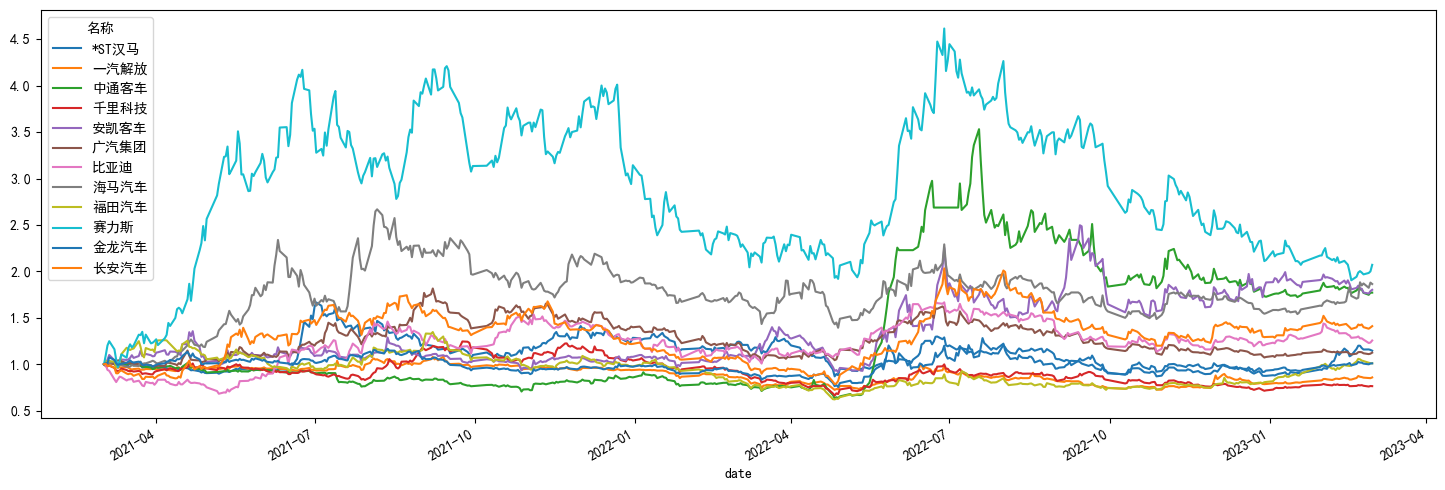

In [14]:
fig=plt.figure(figsize=(18,6))
stock_close_div0.plot(ax=fig.gca())

In [15]:
Y_all

名称,*ST汉马,一汽解放,中通客车,千里科技,安凯客车,广汽集团,比亚迪,海马汽车,福田汽车,赛力斯,金龙汽车,长安汽车
date,,,,,,,,,,,,
2021-03-03,0.007722,0.009520,0.010902,-0.022069,0.014438,0.018034,-0.007768,0.003597,0.031778,0.096606,0.012742,0.005566
2021-03-04,0.001916,-0.012430,-0.010785,0.000000,0.033416,-0.016000,-0.053381,0.006272,-0.002581,0.096667,-0.002489,-0.027099
2021-03-05,0.018642,0.010851,0.031203,0.008463,0.049102,0.013357,-0.010677,0.002671,0.002588,0.038211,0.063202,0.008297
2021-03-08,-0.005631,-0.006011,-0.024790,-0.026573,-0.051941,-0.015473,-0.099509,0.015986,-0.002581,-0.070263,-0.026203,-0.023628
2021-03-09,-0.015573,-0.027646,-0.019065,-0.030172,-0.040939,0.040745,-0.034040,-0.048951,-0.064346,-0.097166,-0.036680,-0.062365
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-23,-0.020917,-0.004000,0.001459,0.003571,-0.003107,-0.002569,0.000074,-0.018147,-0.012561,-0.007821,-0.001237,0.006453
2023-02-24,-0.013558,-0.007028,-0.021015,-0.008897,-0.022161,-0.009789,-0.010527,0.011673,-0.005035,-0.009721,-0.010048,-0.020532
2023-02-27,0.000833,-0.005561,-0.011477,-0.010772,-0.006374,-0.007804,-0.028903,-0.025000,-0.017935,0.007694,-0.007647,-0.011849


## 基于Riskfolio库组合投资优化

* 计算半标准差风险平价投资组合和最大化风险调整收益比的投资组合

估计半标准差的风险平价投资组合和估计最大化风险调整收益比的投资组合在风险衡量、资产配置目标、对收益与波动的侧重、组合构建方法以及适用场景上存在明显区别：
1. **风险衡量方式**
    - **半标准差风险平价投资组合**：主要基于半标准差来衡量风险。半标准差仅考虑收益率低于均值的波动情况 ，聚焦下行风险。比如，在股市下跌期间，它能精准衡量投资组合价值下降的波动程度，忽略收益高于均值部分的波动，对投资者面临的实际损失风险评估更具针对性。
    - **最大化风险调整收益比投资组合**：常用夏普比率等指标衡量风险与收益的综合关系。夏普比率计算的是投资组合在承担单位风险时所能获得的超过无风险收益的额外收益，考虑的是整体收益波动，既包含向上波动也包含向下波动。
2. **资产配置目标**
    - **半标准差风险平价投资组合**：目标是使各资产对投资组合的风险贡献大致相等。通过平衡不同资产的风险敞口，让投资组合在各种市场环境下风险分布更为均匀，避免因某类资产波动过大主导整体风险。假设投资组合包含股票、债券和黄金，会调整各类资产比例，让它们对组合风险的贡献相近。
    - **最大化风险调整收益比投资组合**：旨在找到风险与收益的最佳平衡点，实现风险调整后收益的最大化。在构建组合时，会综合权衡资产的预期收益和风险水平，挑选能使夏普比率等指标达到最优的资产配置方案，追求在同等风险下获取更高收益。
3. **对收益与波动的侧重**
    - **半标准差风险平价投资组合**：更注重控制风险，尤其是下行风险。在资产选择和配置过程中，会优先保障组合的稳定性，在降低风险的基础上追求收益。在市场不稳定或投资者风险承受能力较低时，这种组合能有效减少潜在损失，保障资产安全。
    - **最大化风险调整收益比投资组合**：对收益和风险的权衡更为综合。它不单纯追求低风险或高收益，而是通过优化资产配置，使投资组合在承担一定风险的情况下，获得尽可能高的收益，更符合追求资产增值且能承受一定风险的投资者需求。
4. **组合构建方法**
    - **半标准差风险平价投资组合**：构建过程通常借助复杂的数学模型和算法，精确计算各资产的风险贡献，根据风险平价原则调整资产权重。实践中，可能需要运用优化软件求解多变量约束条件下的最优解，确定各类资产在组合中的占比。
    - **最大化风险调整收益比投资组合**：构建时需预测资产的预期收益、风险以及相关性，通过不断优化资产配置比例，使风险调整收益比达到最大。这可能涉及到历史数据统计分析、宏观经济预测以及资产定价模型的运用，以获取合理的输入参数，找到最优组合。
5. **适用场景**
    - **半标准差风险平价投资组合**：适合风险偏好较低、追求资产稳健增值的投资者，或在市场不确定性高、下行风险较大的环境中。比如在经济衰退预期较强时，这种组合能有效抵御市场波动，保护资产价值。
    - **最大化风险调整收益比投资组合**：更适合风险承受能力适中、追求长期资产增值且愿意承担一定风险的投资者。在市场相对稳定、经济处于增长阶段时，这类组合能更好地发挥优势，实现资产的高效增长。 

In [24]:
Y = Y_all

# 创建投资组合对象
port = rp.Portfolio(returns=Y)

# 以百分比格式显示数据框的值
#pd.options.display.float_format = '{:.4%}'.format

# 选择风险度量
rm = 'MSV'  # 半标准差

# 估计模型的输入（历史估计）
method_mu = 'hist'  # 基于历史数据估计预期收益的方法
method_cov = 'hist'  # 基于历史数据估计协方差矩阵的方法
port.assets_stats(method_mu=method_mu, method_cov=method_cov)

# 估计最大化风险调整收益比的投资组合
w1 = port.optimization(model='Classic', rm=rm, obj='Sharpe', rf=0.0, l=0, hist=True)

# 估计有效前沿（均值 - 半标准差）上的点
ws = port.efficient_frontier(model='Classic', rm=rm, points=20, rf=0, hist=True)

# 估计半标准差的风险平价投资组合
w2 = port.rp_optimization(model='Classic', rm=rm, rf=0, b=None, hist=True)

In [27]:
#ws

In [29]:
w2


,weights
*ST汉马,0.089409
一汽解放,0.128751
中通客车,0.083295
千里科技,0.110176
安凯客车,0.056330
广汽集团,0.087749
比亚迪,0.080177
海马汽车,0.069122
福田汽车,0.088221
赛力斯,0.053120


In [20]:
w1

,weights
*ST汉马,4.328836e-12
一汽解放,1.067719e-10
中通客车,3.000197e-01
千里科技,1.327351e-10
安凯客车,1.629218e-01
广汽集团,4.112205e-11
比亚迪,1.159668e-10
海马汽车,2.982215e-01
福田汽车,7.822153e-11
赛力斯,2.388369e-01


In [22]:
w2

,weights
*ST汉马,0.089409
一汽解放,0.128751
中通客车,0.083295
千里科技,0.110176
安凯客车,0.056330
广汽集团,0.087749
比亚迪,0.080177
海马汽车,0.069122
福田汽车,0.088221
赛力斯,0.053120


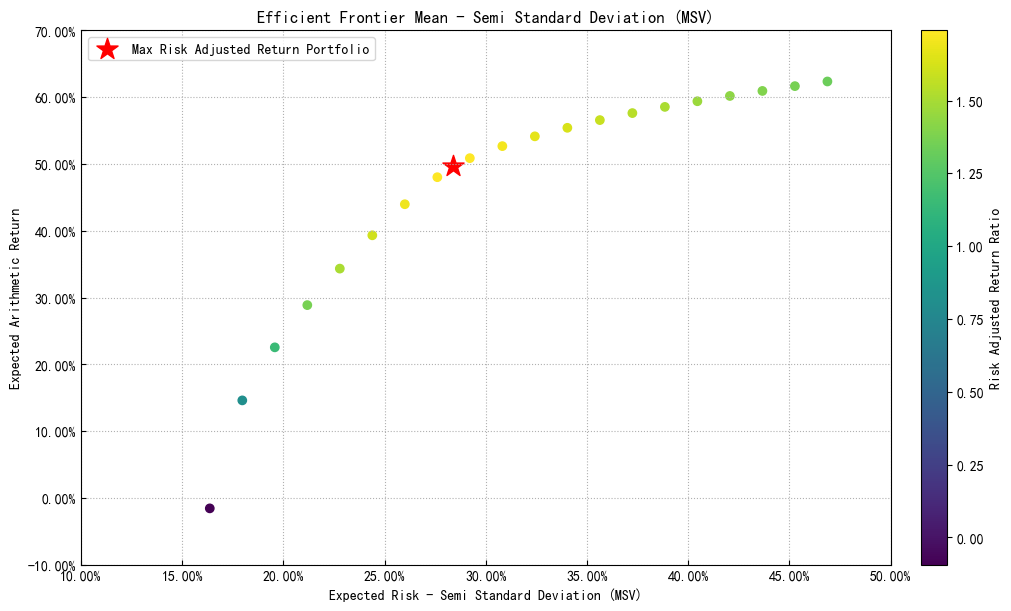

In [28]:
label = 'Max Risk Adjusted Return Portfolio'
mu = port.mu
cov = port.cov
returns = port.returns

ax = rp.plot_frontier(w_frontier=ws,
                      mu=mu,
                      cov=cov,
                      returns=returns,
                      rm=rm,
                      rf=0,
                      alpha=0.05,
                      cmap='viridis',
                      w=w1,
                      label=label,
                      marker='*',
                      s=16,
                      c='r',
                      height=6,
                      width=10,
                      t_factor=252,
                      ax=None)

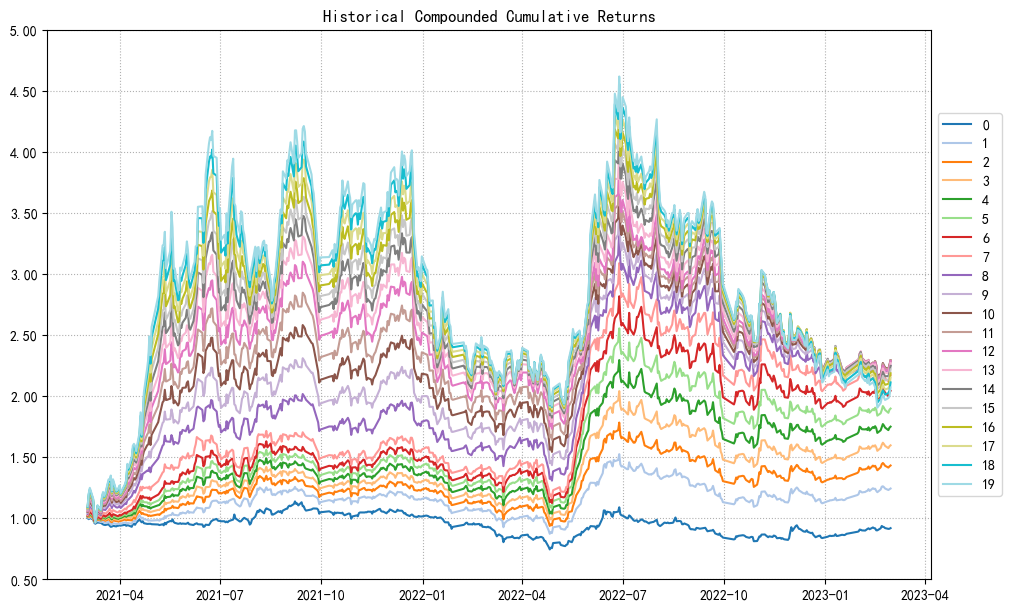

In [30]:
ax = rp.plot_series(returns=Y,
                    w=ws,
                    cmap='tab20',
                    height=6,
                    width=10,
                    ax=None)

### classwork1

上面课件的运行

* 获取对应行业的股票
* 把股票转为riskfolio要求的格式
* 放入riskfolio进行组合优化并画图

## pybroker框架下的组合投资实现

### 最简单的组合投资策略实现——等额仓位配置

* pybroker下重新平衡仓位

* 两种方法的区别：

strategy.add_execution(None, stock_qiche["代码"].values)

strategy.set_after_exec(rebalance)

* ctxs: dict[str, ExecContext] 的必要性

In [86]:
pybroker.param('aa',0)

0

In [87]:
pybroker.param('aa',0)

0

In [73]:
#假设我们希望每月初对一个只做多头的投资组合进行重新平衡，以确保投资组合中的每只股票都有大致相等的配置。
#首先，我们编写一个辅助函数，用于检测当前 K 线的日期是否为新月的开始：
def start_of_month(ctxs: dict[str, ExecContext]) -> bool:
    dt = tuple(ctxs.values())[0].dt
    if dt.month != pybroker.param('current_month'):
        pybroker.param('current_month', dt.month)
        return True
    return False

#接下来，我们实现一个函数，该函数将买入或卖出足够数量的股票，以达到目标配置。
#如果当前配置高于目标水平，该函数将卖出所需数量的资产股票；如果当前配置低于目标水平，该函数将买入所需数量的资产股票。
def set_target_shares(
    ctxs: dict[str, ExecContext],
    targets: dict[str, float]
):
    for symbol, target in targets.items():
        ctx = ctxs[symbol]
        target_shares = ctx.calc_target_shares(target)
        pos = ctx.long_pos()
        if pos is None:
            ctx.buy_shares = target_shares
        elif pos.shares < target_shares:
            ctx.buy_shares = target_shares - pos.shares
        elif pos.shares > target_shares:
            ctx.sell_shares = pos.shares - target_shares

#随后，我们编写一个rebalance函数，以便在每月初将每种资产的配置调整为相等：
def rebalance(ctxs: dict[str, ExecContext]):
    if start_of_month(ctxs):
        target = 1 / len(ctxs)
        set_target_shares(ctxs, {symbol: target for symbol in ctxs.keys()})

现在我们已经实现了rebalance函数，下一步是使用五只股票的投资组合对我们的重新平衡策略进行回测。为了在每根数据 K 线上同时处理所有股票，我们将使用Strategy#set_after_exec方法：

In [74]:
strategy = Strategy(akshare, start_date='3/2/2021', end_date='3/1/2023')
strategy.add_execution(None, stock_qiche["代码"].values)
strategy.set_after_exec(rebalance)
result = strategy.backtest()

Backtesting: 2021-03-02 00:00:00 to 2023-03-01 00:00:00

Loading bar data...
Loaded bar data: 0:00:01 

Test split: 2021-03-02 00:00:00 to 2023-03-01 00:00:00


  0% (0 of 486) |                        | Elapsed Time: 0:00:00 ETA:  --:--:--
  2% (11 of 486) |                       | Elapsed Time: 0:00:00 ETA:   0:00:03
  6% (31 of 486) |#                      | Elapsed Time: 0:00:00 ETA:   0:00:02
 10% (51 of 486) |##                     | Elapsed Time: 0:00:00 ETA:   0:00:01
 14% (71 of 486) |###                    | Elapsed Time: 0:00:00 ETA:   0:00:01
 18% (91 of 486) |####                   | Elapsed Time: 0:00:00 ETA:   0:00:01
 22% (111 of 486) |#####                 | Elapsed Time: 0:00:00 ETA:   0:00:01
 26% (131 of 486) |#####                 | Elapsed Time: 0:00:00 ETA:   0:00:01
 31% (151 of 486) |######                | Elapsed Time: 0:00:00 ETA:   0:00:01
 35% (171 of 486) |#######               | Elapsed Time: 0:00:00 ETA:   0:00:01
 39% (191 of 486) |########              | Elapsed Time: 0:00:00 ETA:   0:00:01
 43% (211 of 486) |#########             | Elapsed Time: 0:00:00 ETA:   0:00:00
 47% (231 of 486) |##########           


Finished backtest: 0:00:07


In [ ]:
pybroker.param('lookback', 100)  # Use past year of returns.

def calculate_returns(ctxs: dict[str, ExecContext], lookback: int):
    prices = {}
    for ctx in ctxs.values():
        prices[ctx.symbol] = ctx.close[-lookback:]
    df = pd.DataFrame(prices)
    return df.pct_change().dropna()

def optimization(ctxs: dict[str, ExecContext]):
    lookback = pybroker.param('lookback')
    if start_of_month(ctxs):
        Y = calculate_returns(ctxs, lookback)
        port = rp.Portfolio(returns=Y)
        port.assets_stats(method_mu='hist', method_cov='hist')
        w = port.optimization(
            model='Classic',
            rm='CVaR',
            obj='MinRisk',
            rf=0,      # Risk free rate.
            l=0,       # Risk aversion factor.
            hist=True  # Use historical scenarios.
        )
        targets = {
            symbol: w.T[symbol].values[0]
            for symbol in ctxs.keys()
        }
        set_target_shares(ctxs, targets)

In [93]:
strategy.set_after_exec(optimization)
result = strategy.backtest(warmup=pybroker.param('lookback'))

Backtesting: 2021-03-02 00:00:00 to 2023-03-01 00:00:00



Loaded cached bar data.

Test split: 2021-03-02 00:00:00 to 2023-03-01 00:00:00


  0% (0 of 486) |                        | Elapsed Time: 0:00:00 ETA:  --:--:--
 22% (111 of 486) |#####                 | Elapsed Time: 0:00:00 ETA:   0:00:00
 26% (131 of 486) |#####                 | Elapsed Time: 0:00:00 ETA:   0:00:00
 31% (151 of 486) |######                | Elapsed Time: 0:00:00 ETA:   0:00:00
 35% (171 of 486) |#######               | Elapsed Time: 0:00:00 ETA:   0:00:00
 39% (191 of 486) |########              | Elapsed Time: 0:00:00 ETA:   0:00:00
 43% (211 of 486) |#########             | Elapsed Time: 0:00:00 ETA:   0:00:00
 47% (231 of 486) |##########            | Elapsed Time: 0:00:00 ETA:   0:00:00
 51% (251 of 486) |###########           | Elapsed Time: 0:00:00 ETA:   0:00:00
 55% (271 of 486) |############          | Elapsed Time: 0:00:00 ETA:   0:00:00
 59% (291 of 486) |#############         | Elapsed Time: 0:00:00 ETA:   0:00:00
 63% (311 of 486) |##############        | Elapsed Time: 0:00:00 ETA:   0:00:00
 68% (331 of 486) |##############       


Finished backtest: 0:00:01


In [79]:
result.orders

,type,symbol,date,shares,limit_price,fill_price,fees
id,,,,,,,
1,buy,000572,2021-03-03,2741,NaN,309.0000%,0.0000%
2,buy,000625,2021-03-03,483,NaN,1708.0000%,0.0000%
3,buy,000800,2021-03-03,719,NaN,1156.0000%,0.0000%
4,buy,000868,2021-03-03,2222,NaN,382.0000%,0.0000%
5,buy,000957,2021-03-03,1240,NaN,671.0000%,0.0000%
...,...,...,...,...,...,...,...
269,buy,000868,2023-02-02,90,NaN,707.0000%,0.0000%
270,buy,000957,2023-02-02,23,NaN,1302.0000%,0.0000%
271,buy,600686,2023-02-02,65,NaN,636.0000%,0.0000%


In [94]:
result.metrics_df

,name,value
0,trade_count,8300.0000%
1,initial_market_value,10000000.0000%
2,end_market_value,10595275.0000%
3,total_pnl,-508965.0000%
4,unrealized_pnl,1104240.0000%
5,total_return_pct,-508.9650%
6,total_profit,3606264.0000%
7,total_loss,-4115229.0000%
8,total_fees,0.0000%
9,max_drawdown,-3853749.0000%


## classwork2

* 船舶制造行业市盈率前10的股票的组合投资优化策略实现，时间2022年1月1日-2024年1月1日

## 层次聚类

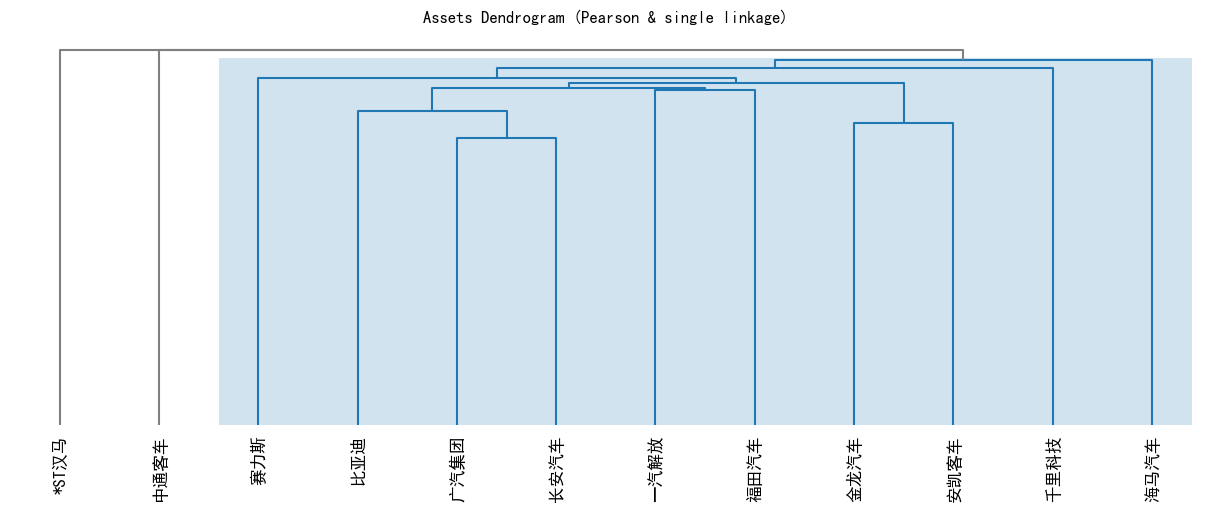

In [39]:
import riskfolio as rp

# Plotting Assets Clusters

ax = rp.plot_dendrogram(returns=Y_all,
                        codependence='pearson',
                        linkage='single',
                        k=None,
                        max_k=10,
                        leaf_order=True,
                        ax=None)